# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Question 1

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

In [1]:
# Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')


#### Read the dataset

In [2]:
# Importing the data set:
ds = pd.read_csv('01-23-2021.csv')

print(ds)

      FIPS Admin2    Province_State  Country_Region          Last_Update  \
0      NaN    NaN               NaN     Afghanistan  2021-01-24 05:22:35   
1      NaN    NaN               NaN         Albania  2021-01-24 05:22:35   
2      NaN    NaN               NaN         Algeria  2021-01-24 05:22:35   
3      NaN    NaN               NaN         Andorra  2021-01-24 05:22:35   
4      NaN    NaN               NaN          Angola  2021-01-24 05:22:35   
...    ...    ...               ...             ...                  ...   
4009   NaN    NaN           Unknown         Ukraine  2021-01-24 05:22:35   
4010   NaN    NaN               NaN           Nauru  2021-01-24 05:22:35   
4011   NaN    NaN              Niue     New Zealand  2021-01-24 05:22:35   
4012   NaN    NaN               NaN          Tuvalu  2021-01-24 05:22:35   
4013   NaN    NaN  Pitcairn Islands  United Kingdom  2021-01-24 05:22:35   

           Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0     33.93911   67

#### Display the top 5 rows in the data

In [3]:
# Displaying the first 5 rows
ds.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-24 05:22:35  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-24 05:22:35  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-24 05:22:35  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-24 05:22:35  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-24 05:22:35 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      54559    2373      46943    5243  Afghanistan   
1  20.168300      71441    1310      43384   26747      Albania   
2   1.659600     105369    2861      71755   30753      Algeria   
3   1.521800       9499      96       8588     815      Andorra   
4  17.873900      19367     457      17249    1661       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     140.152389             4.349420  
1    2482.486622             1.833681  
2     240.288469             2.715220  
3   12294.052935             1.010633  
4      58.926678             2.359684

#### Show the information of the dataset

In [4]:
# Basic info about our data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            4014 non-null   int64  
 10  Active               4014 non-null   int64  
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3966 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
# Finding the sum of null values
null_values = ds.isnull().sum()
null_values

FIPS                   748
Admin2                 743
Province_State         179
Country_Region           0
Last_Update              0
Lat                     90
Long_                   90
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
# Displaying the number of confirmed cases by country
Country_Confirmed = ds.groupby('Country_Region')[['Confirmed']].sum().reset_index()
Country_Confirmed

Country_Region  Confirmed
0             Afghanistan      54559
1                 Albania      71441
2                 Algeria     105369
3                 Andorra       9499
4                  Angola      19367
..                    ...        ...
196    West Bank and Gaza     155006
197  Winter Olympics 2022          0
198                 Yemen       2118
199                Zambia      44592
200              Zimbabwe      31007

[201 rows x 2 columns]

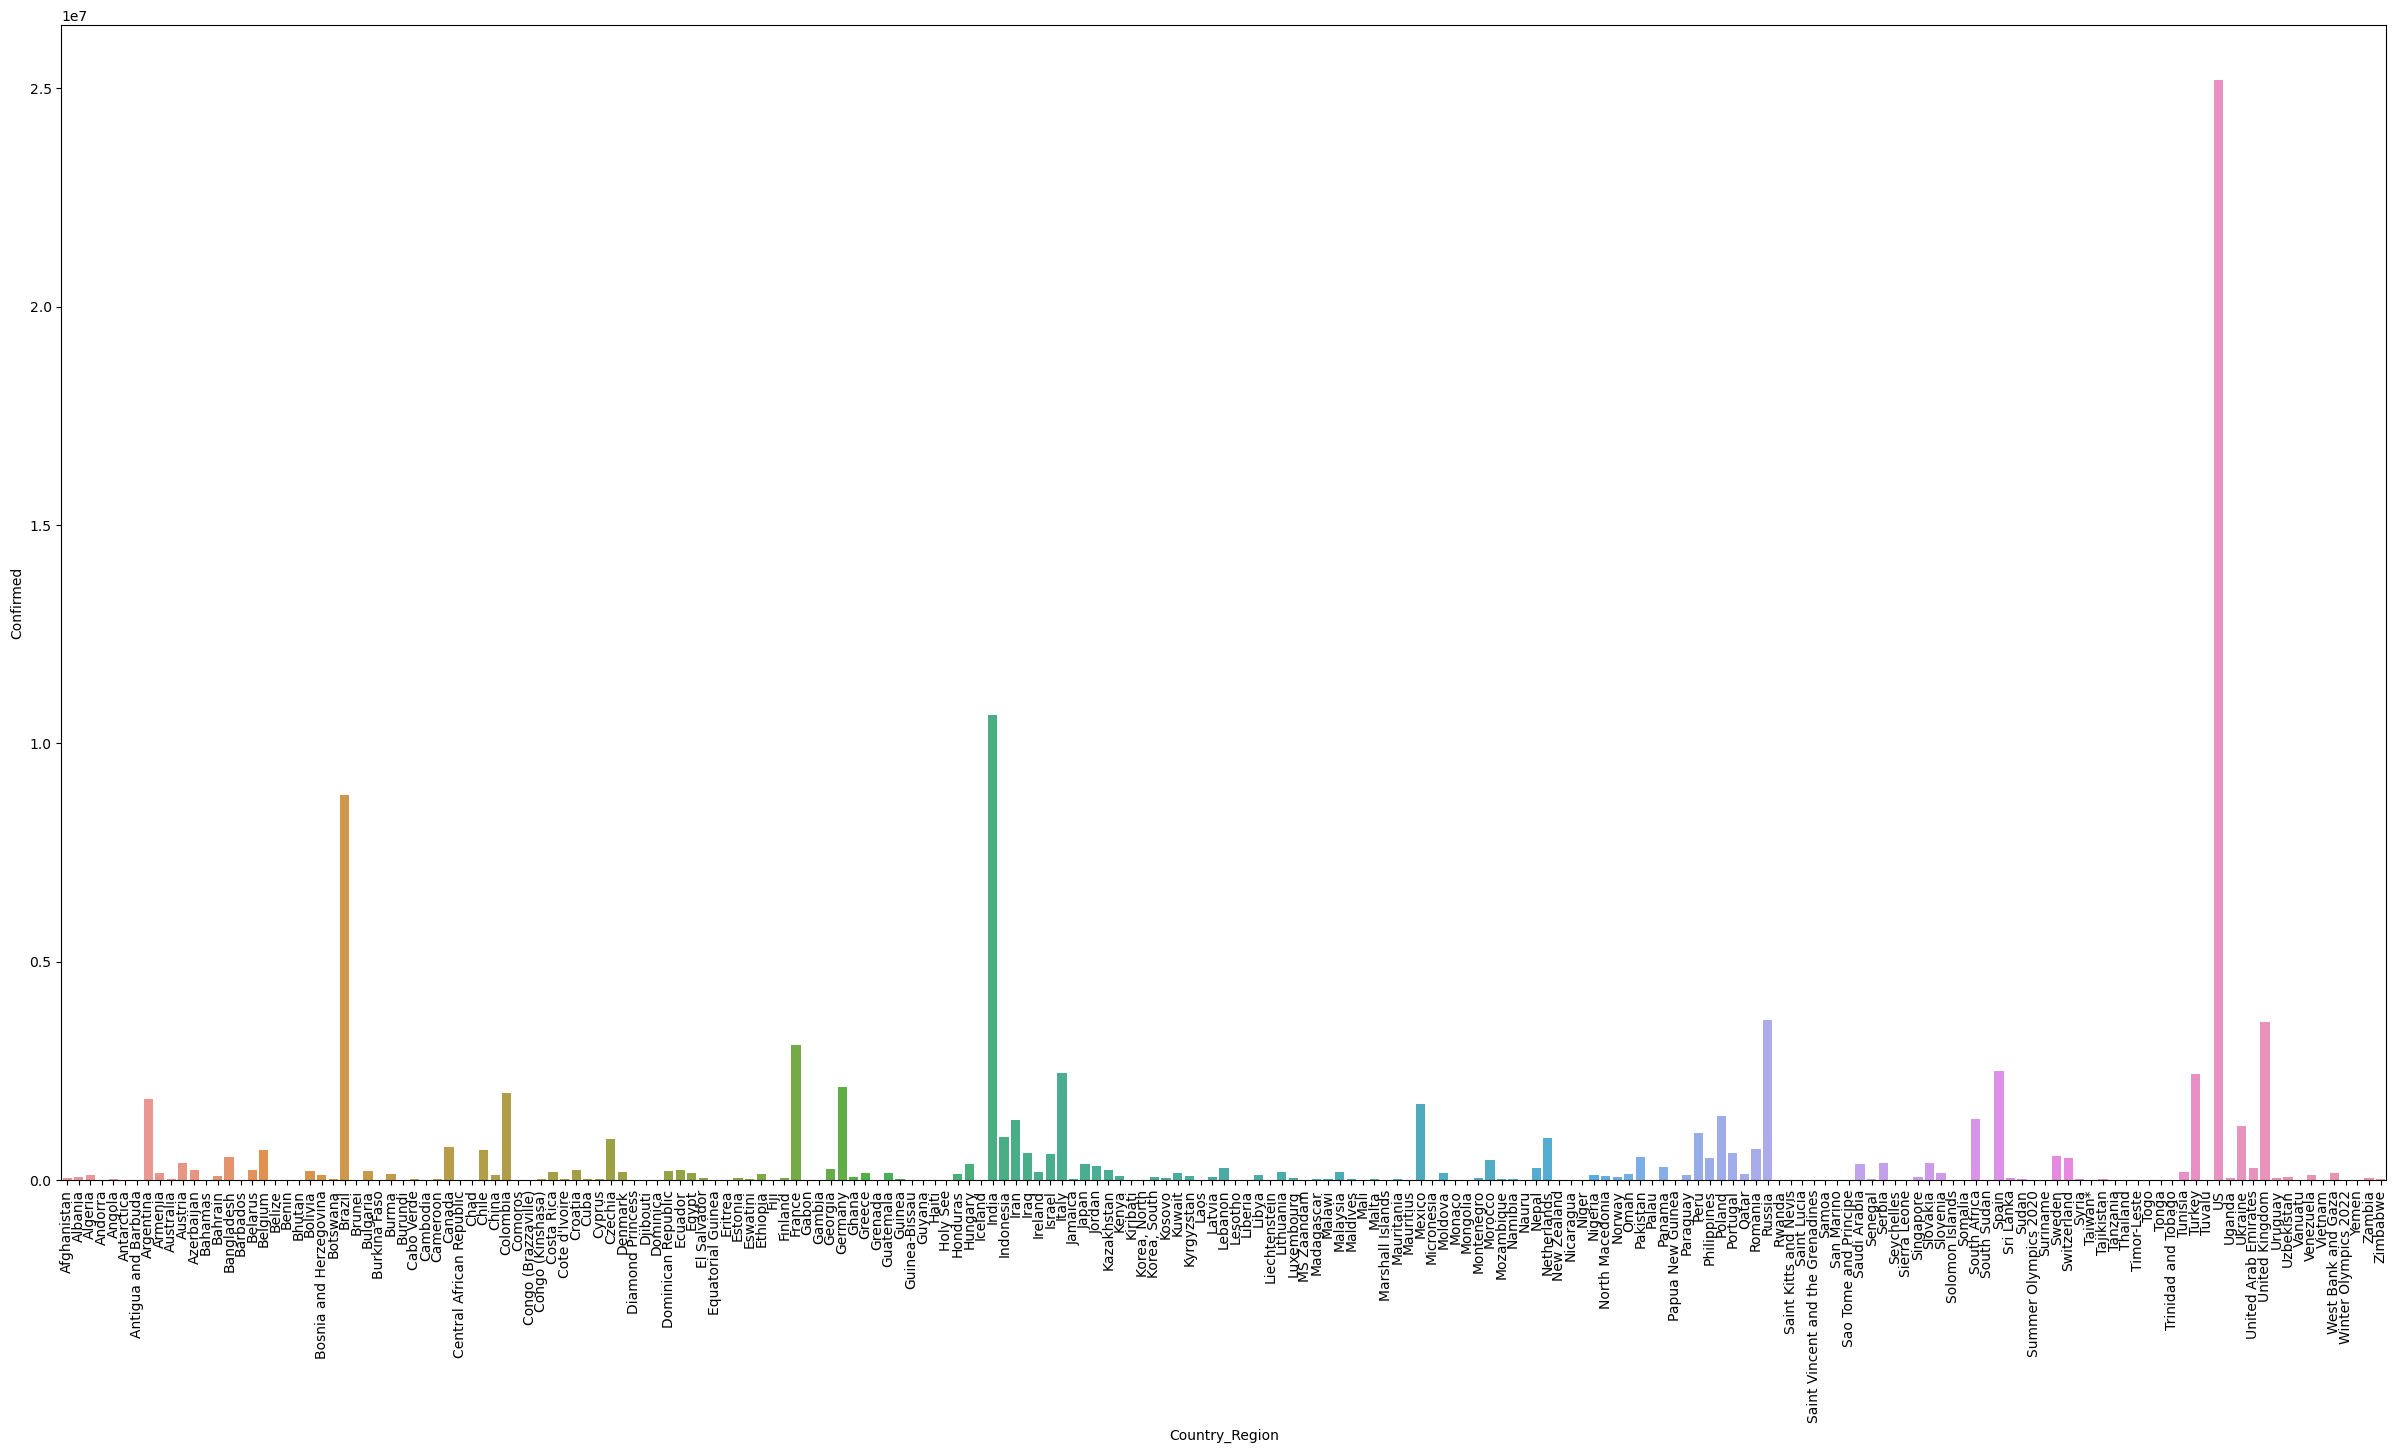

In [7]:
# Plotting the data:
fig = plt.figure(figsize=(30,15))
sns.barplot(data=Country_Confirmed,x='Country_Region',y='Confirmed')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Create an interactive bar plot
fig = px.bar(Country_Confirmed, x='Country_Region', y='Confirmed')

# Show the figure
fig.show()

#### Show the number of Deaths by Country

In [9]:
# Displaying the number of deaths by country
Country_Deaths = ds.groupby('Country_Region')[['Deaths']].sum().reset_index()
Country_Deaths

Country_Region  Deaths
0             Afghanistan    2373
1                 Albania    1310
2                 Algeria    2861
3                 Andorra      96
4                  Angola     457
..                    ...     ...
196    West Bank and Gaza    1783
197  Winter Olympics 2022       0
198                 Yemen     615
199                Zambia     627
200              Zimbabwe     974

[201 rows x 2 columns]

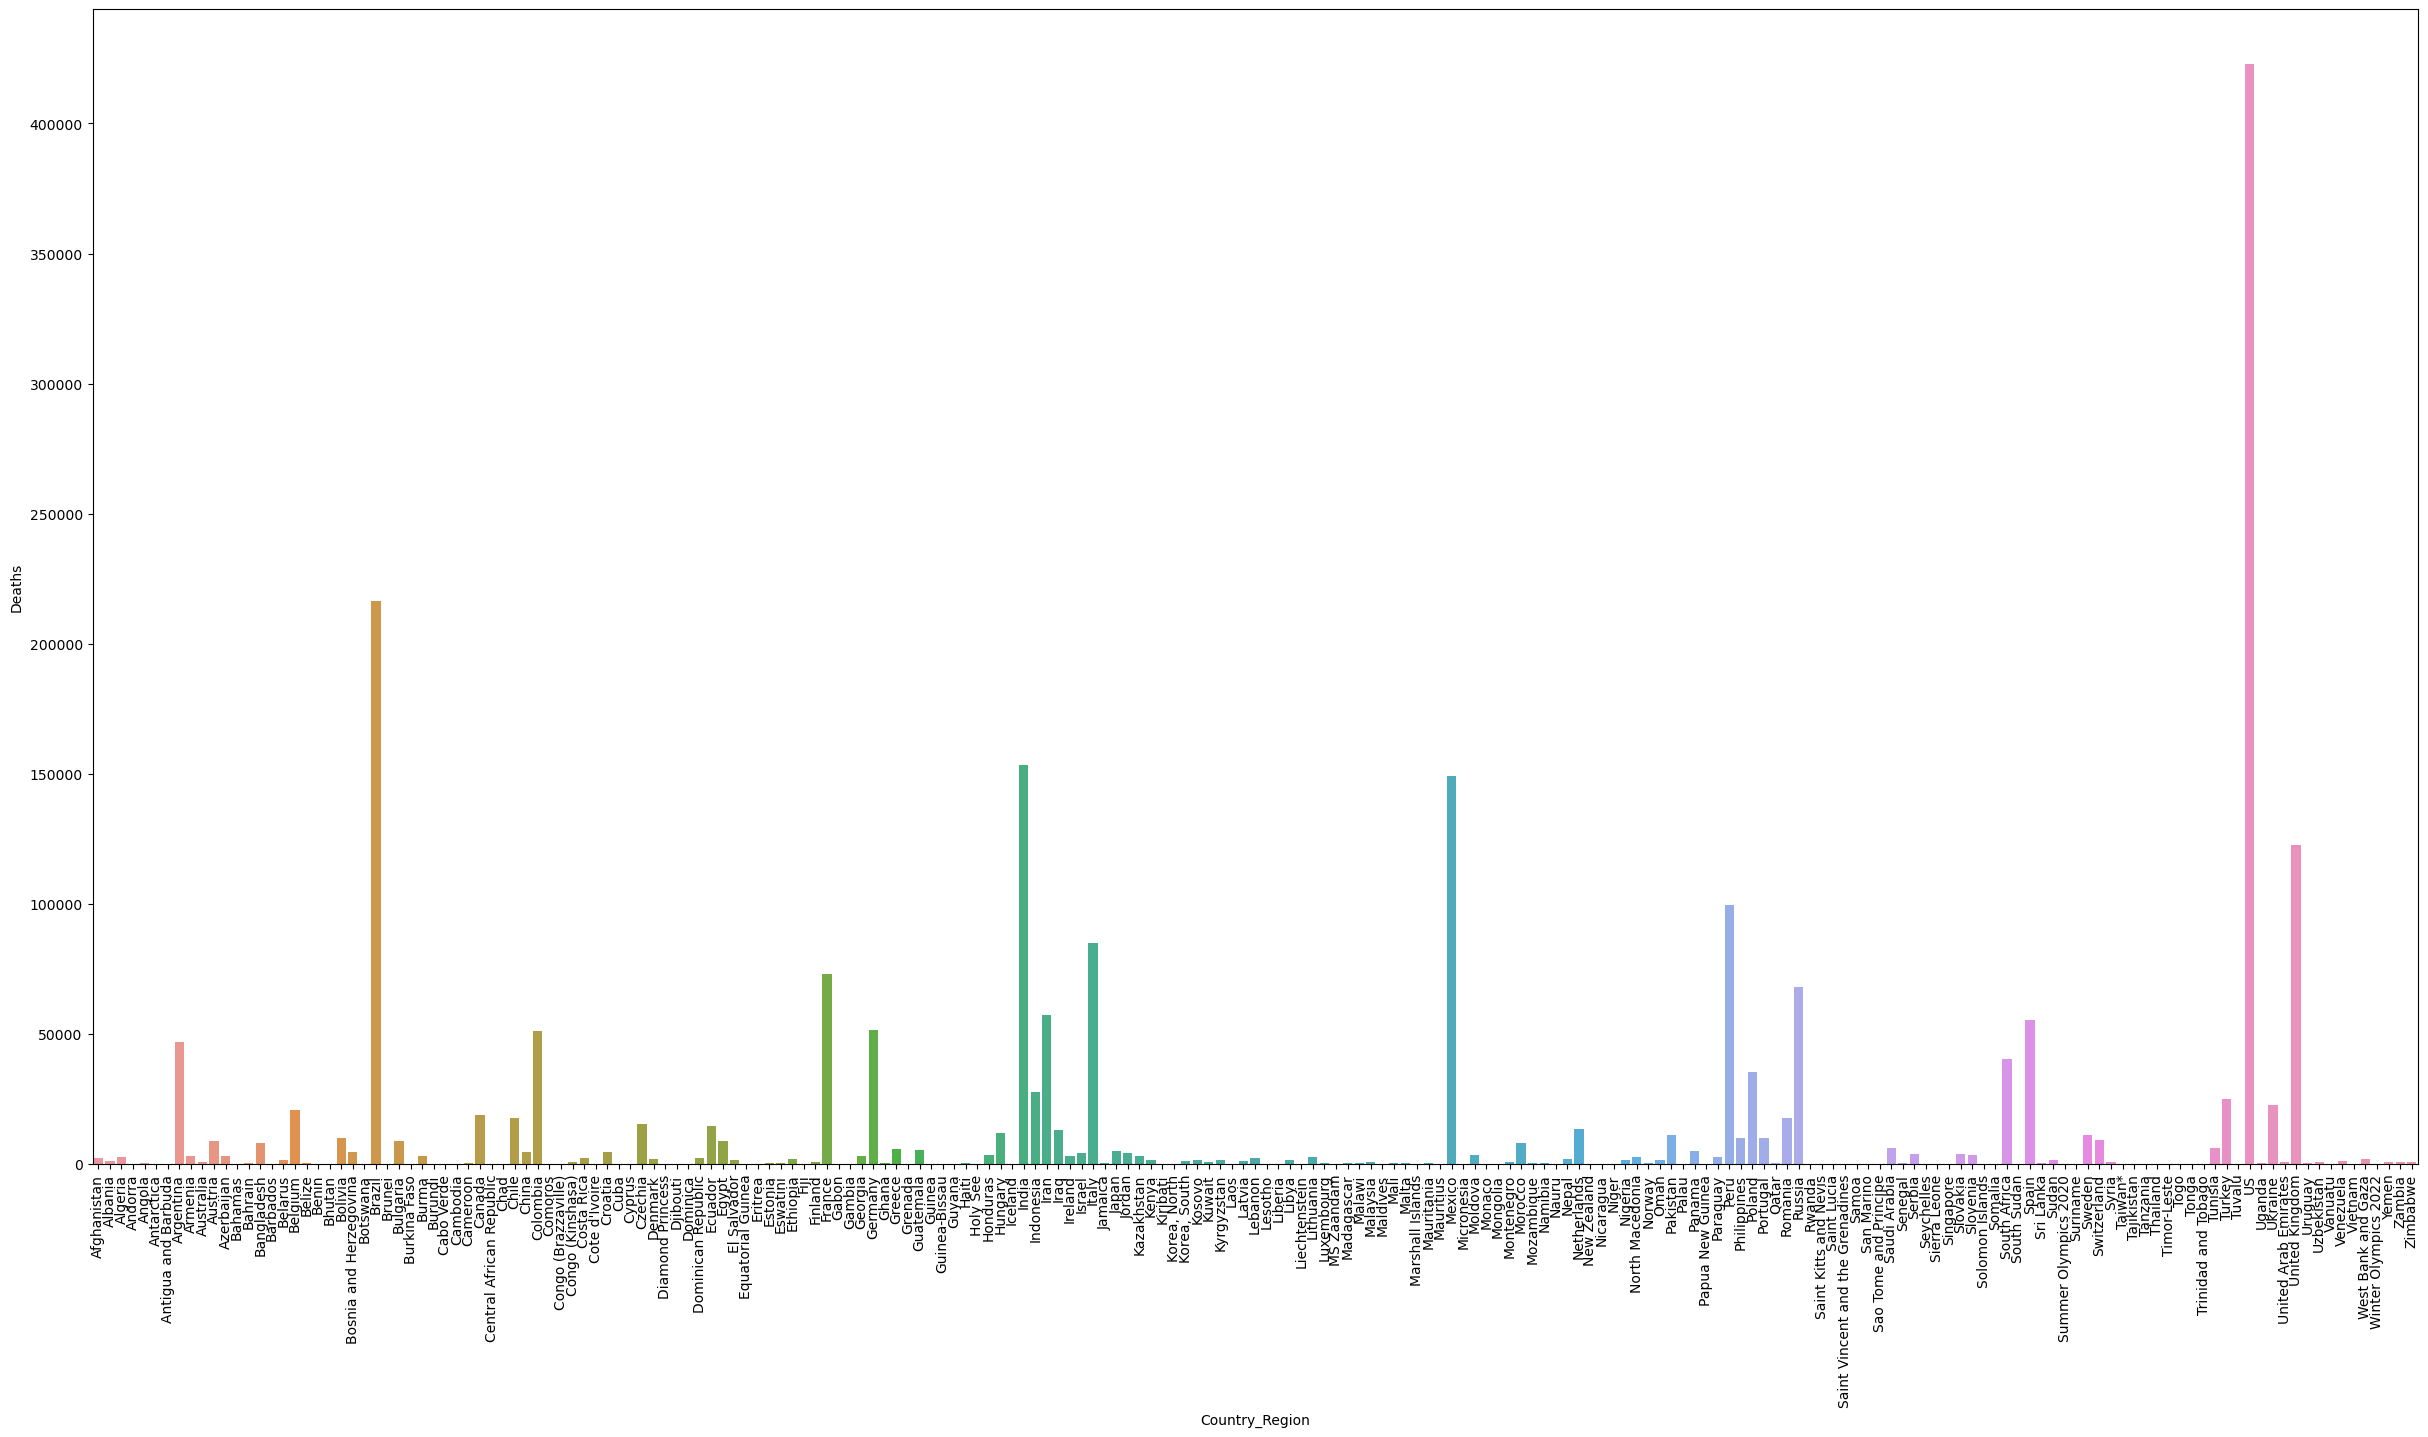

In [10]:
# Plotting the data:
fig = plt.figure(figsize=(30,15))
sns.barplot(data=Country_Deaths,x='Country_Region',y='Deaths')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Create an interactive bar plot
fig = px.bar(Country_Deaths, x='Country_Region', y='Deaths')

# Show the figure
fig.show()

#### Show the number of Recovered cases by Country

In [12]:
Recoverd_Country = ds.groupby('Country_Region')[['Recovered']].sum().reset_index()
Recoverd_Country

Country_Region  Recovered
0             Afghanistan      46943
1                 Albania      43384
2                 Algeria      71755
3                 Andorra       8588
4                  Angola      17249
..                    ...        ...
196    West Bank and Gaza     144297
197  Winter Olympics 2022          0
198                 Yemen       1423
199                Zambia      34293
200              Zimbabwe      21377

[201 rows x 2 columns]

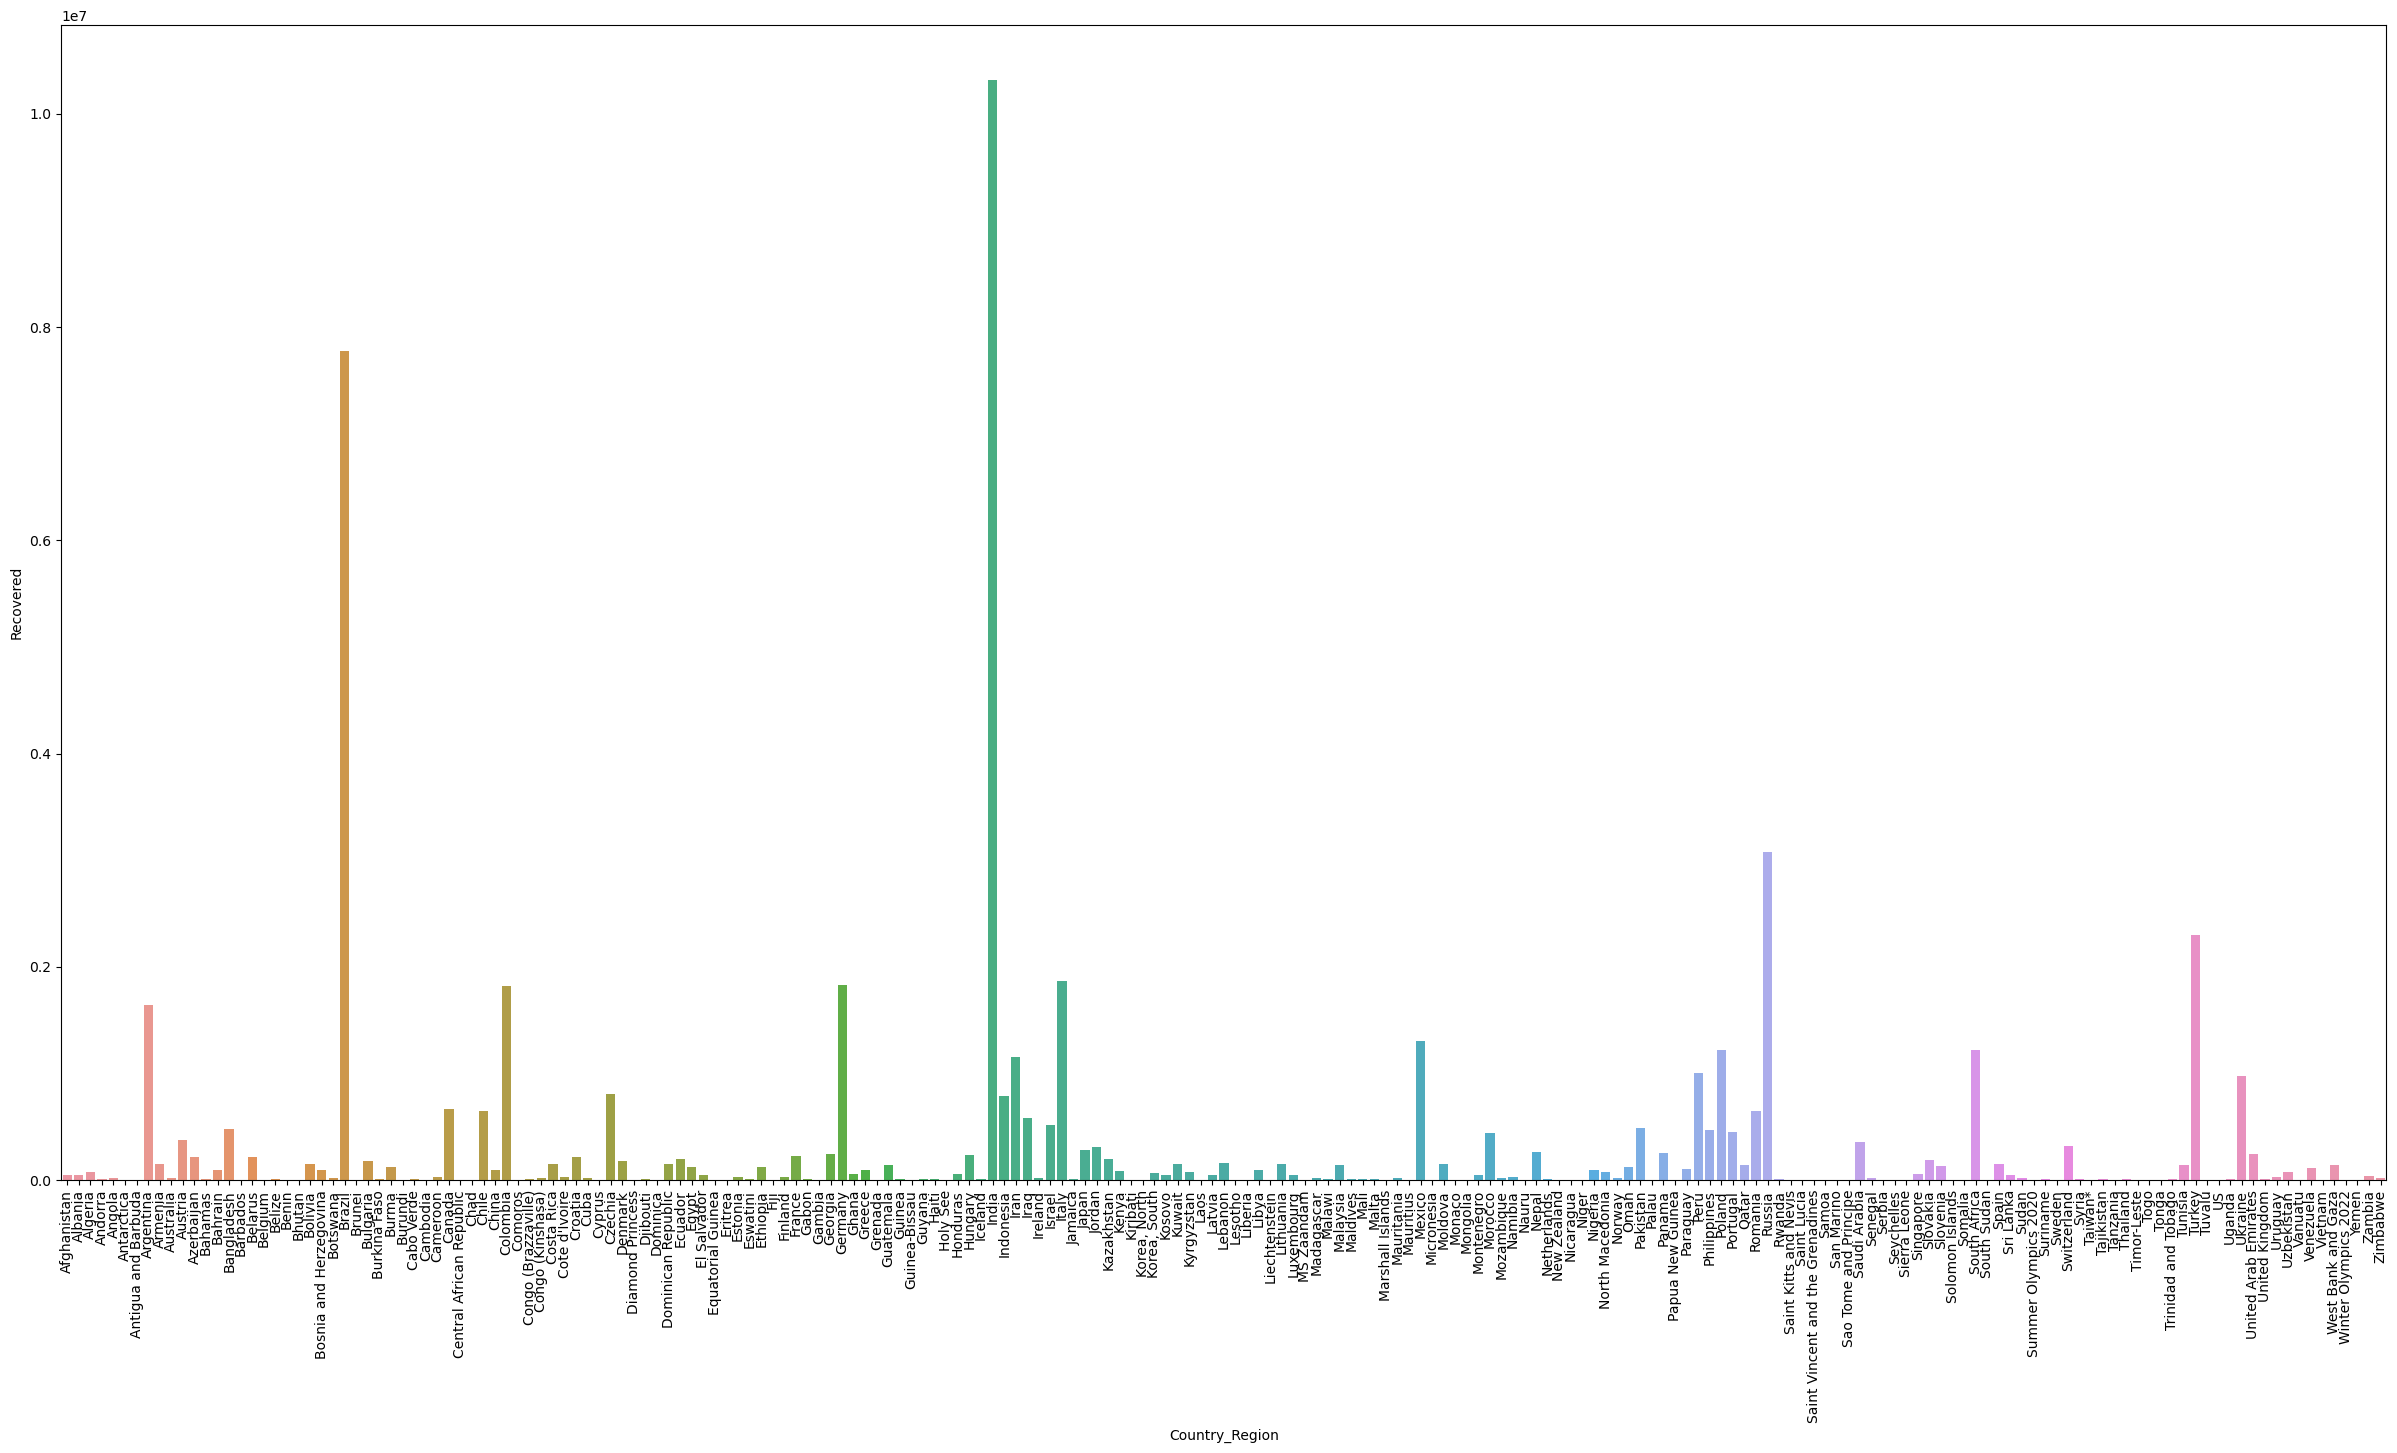

In [13]:
# Plotting the data:
fig = plt.figure(figsize=(30,15))
sns.barplot(data=Recoverd_Country,x='Country_Region',y='Recovered')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Create an interactive bar plot
fig = px.bar(Recoverd_Country, x='Country_Region', y='Recovered')

# Show the figure
fig.show()

#### Show the number of Active Cases by Country

In [15]:
# Displaying the number of active cases by country
Active_Country = ds.groupby('Country_Region')[['Active']].sum().reset_index()
Active_Country

Country_Region  Active
0             Afghanistan    5243
1                 Albania   26747
2                 Algeria   30753
3                 Andorra     815
4                  Angola    1661
..                    ...     ...
196    West Bank and Gaza    8926
197  Winter Olympics 2022       0
198                 Yemen      80
199                Zambia    9672
200              Zimbabwe    8656

[201 rows x 2 columns]

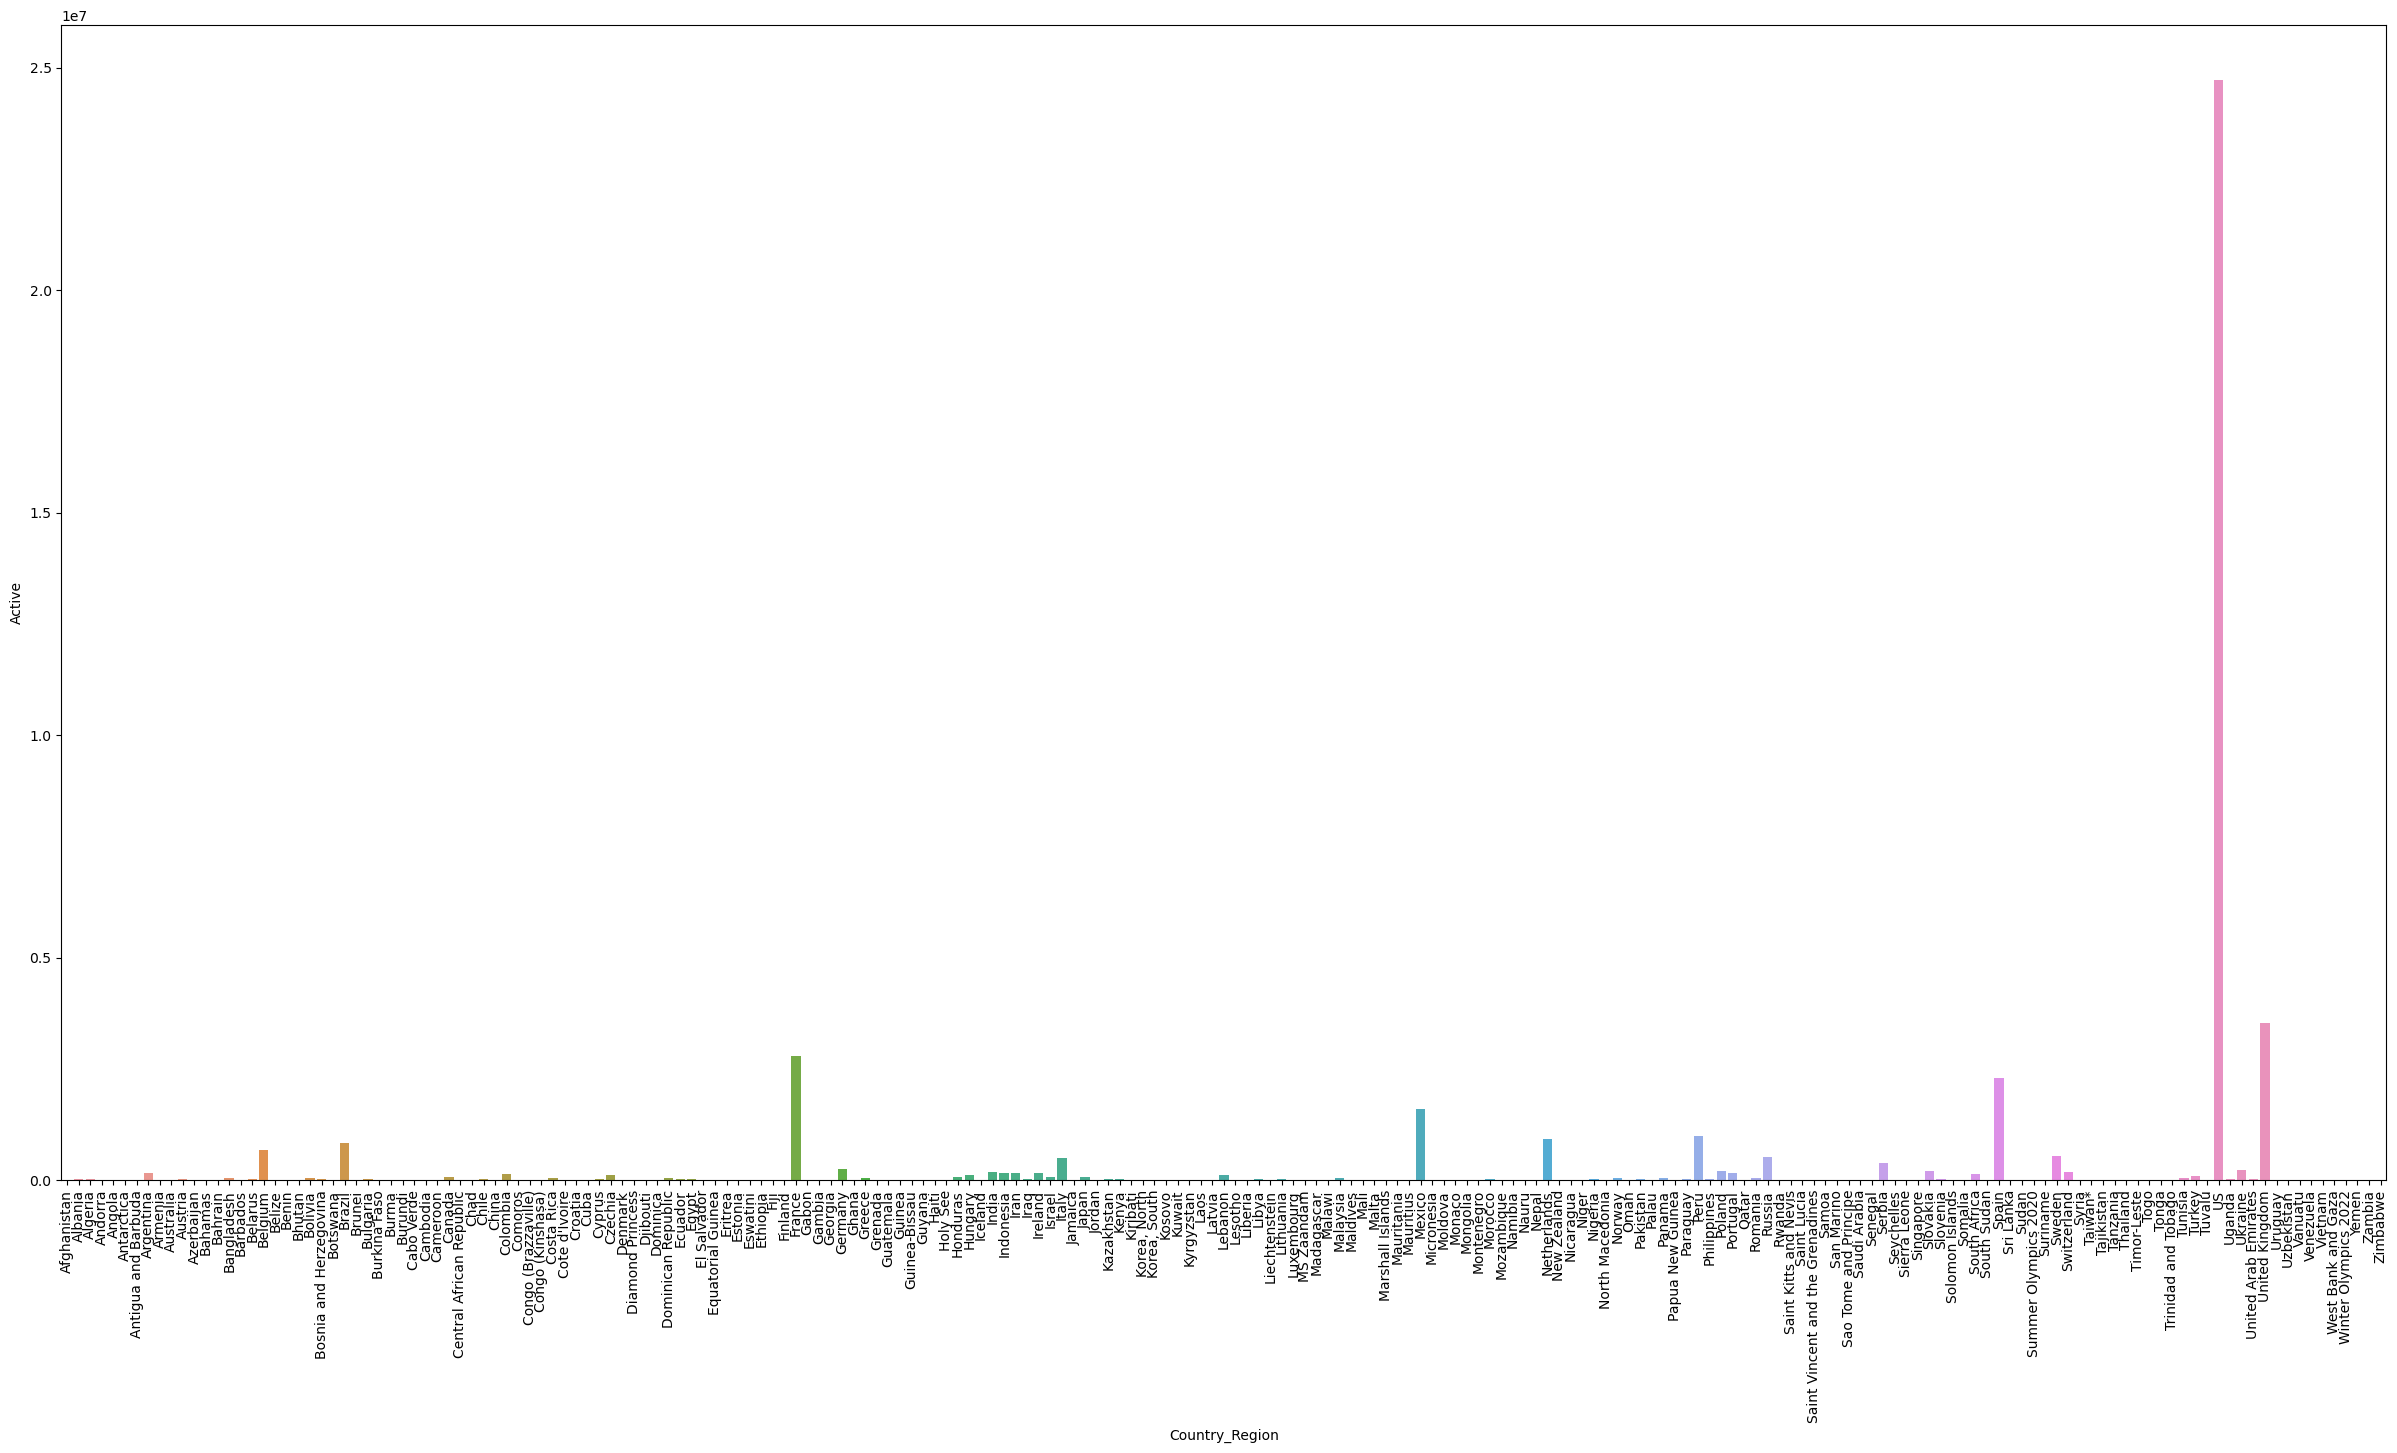

In [16]:
# Plotting the data:
fig = plt.figure(figsize=(30,15))
sns.barplot(data=Active_Country,x='Country_Region',y='Active')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Create an interactive bar plot
fig = px.bar(Active_Country, x='Country_Region', y='Active')

# Show the figure
fig.show()

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [18]:
# # Displaying the number of Confirmed, Deaths, Recovered and Active cases by country
ds.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

Country_Region  Confirmed  Deaths  Recovered  Active
0             Afghanistan      54559    2373      46943    5243
1                 Albania      71441    1310      43384   26747
2                 Algeria     105369    2861      71755   30753
3                 Andorra       9499      96       8588     815
4                  Angola      19367     457      17249    1661
..                    ...        ...     ...        ...     ...
196    West Bank and Gaza     155006    1783     144297    8926
197  Winter Olympics 2022          0       0          0       0
198                 Yemen       2118     615       1423      80
199                Zambia      44592     627      34293    9672
200              Zimbabwe      31007     974      21377    8656

[201 rows x 5 columns]

### Question 3

### Show the countries with no recovered cases

In [19]:
# Displaying the countries with no recovered cases
No_Record = ds.groupby('Country_Region')[['Recovered']].sum().reset_index()
No_Record[No_Record['Recovered']==0]

Country_Region  Recovered
5              Antarctica          0
17                Belgium          0
92               Kiribati          0
93           Korea, North          0
118            Micronesia          0
126                 Nauru          0
137                 Palau          0
157                Serbia          0
170  Summer Olympics 2020          0
172                Sweden          0
181                 Tonga          0
185                Tuvalu          0
186                    US          0
197  Winter Olympics 2022          0

#### Show the countries with no confirmed cases

In [20]:
# Displaying the countries with no confirmed cases
Not_Confirmed = ds.groupby('Country_Region')[['Confirmed']].sum().reset_index()
Not_Confirmed[Not_Confirmed['Confirmed'] == 0]

Country_Region  Confirmed
5              Antarctica          0
92               Kiribati          0
93           Korea, North          0
126                 Nauru          0
137                 Palau          0
170  Summer Olympics 2020          0
181                 Tonga          0
185                Tuvalu          0
197  Winter Olympics 2022          0

#### Show the countries with no deaths

In [21]:
# Displaying the countries with no deaths
No_Deaths = ds.groupby('Country_Region')[['Deaths']].sum().reset_index()
No_Deaths[No_Deaths['Deaths'] == 0]

Country_Region  Deaths
5               Antarctica       0
31                Cambodia       0
51                Dominica       0
76                Holy See       0
92                Kiribati       0
93            Korea, North       0
98                    Laos       0
114       Marshall Islands       0
118             Micronesia       0
126                  Nauru       0
137                  Palau       0
149  Saint Kitts and Nevis       0
152                  Samoa       0
163        Solomon Islands       0
170   Summer Olympics 2020       0
179            Timor-Leste       0
181                  Tonga       0
185                 Tuvalu       0
193                Vanuatu       0
197   Winter Olympics 2022       0

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [22]:
# Displaying the Top 10 countries with confirmed cases
Country_RankDiscriptor = ds.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()
Top10_Country = Country_RankDiscriptor.nlargest(10,'Confirmed')
Top10_Country

Confirmed  Deaths  Recovered    Active
Country_Region                                        
US               25187889  422809          0  24719871
India            10654533  153339   10316786    184408
Brazil            8821815  216587    7775928    823881
Russia            3658447   67919    3076236    514292
United Kingdom    3627726  122458       8830   3521402
France            3093740   73017     222840   2797883
Spain             2499560   55441     150376   2293743
Italy             2455185   85162    1871189    498834
Turkey            2424328   24933    2301861     97534
Germany           2131765   51521    1826161    259657

#### Show the Top 10 Countries with Active cases

In [23]:
# Displaying the Top 10 countries with active cases
Country_RankDiscriptor = ds.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()
Top10_Country = Country_RankDiscriptor.nlargest(10,'Active')
Top10_Country

Confirmed  Deaths  Recovered    Active
Country_Region                                        
US               25187889  422809          0  24719871
United Kingdom    3627726  122458       8830   3521402
France            3093740   73017     222840   2797883
Spain             2499560   55441     150376   2293743
Mexico            1752347  149084    1306138   1603263
Peru              1082907   99411    1002516    983496
Netherlands        957213   13616      12335    931262
Brazil            8821815  216587    7775928    823881
Belgium            691854   20726          0    679676
Sweden             547166   11005          0    536161

### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Filtering the data for cases with Deaths exceeding 50000
filtered_ds = ds[ds['Deaths'] > 50000][['Country_Region','Confirmed','Recovered','Active','Deaths']]
filter_ds = ds.groupby('Country_Region')[['Confirmed','Recovered','Active','Deaths']].sum()
filter_ds = filter_ds[filter_ds['Deaths'] > 50000]
filter_ds

Confirmed  Recovered    Active  Deaths
Country_Region                                        
Brazil            8821815    7775928    823881  216587
Colombia          2002969    1822309    129678   50982
France            3093740     222840   2797883   73017
Germany           2131765    1826161    259657   51521
India            10654533   10316786    184408  153339
Iran              1367032    1158475    151263   57294
Italy             2455185    1871189    498834   85162
Mexico            1752347    1306138   1603263  149084
Peru              1082907    1002516    983496   99411
Russia            3658447    3076236    514292   67919
Spain             2499560     150376   2293743   55441
US               25187889          0  24719871  422809
United Kingdom    3627726       8830   3521402  122458

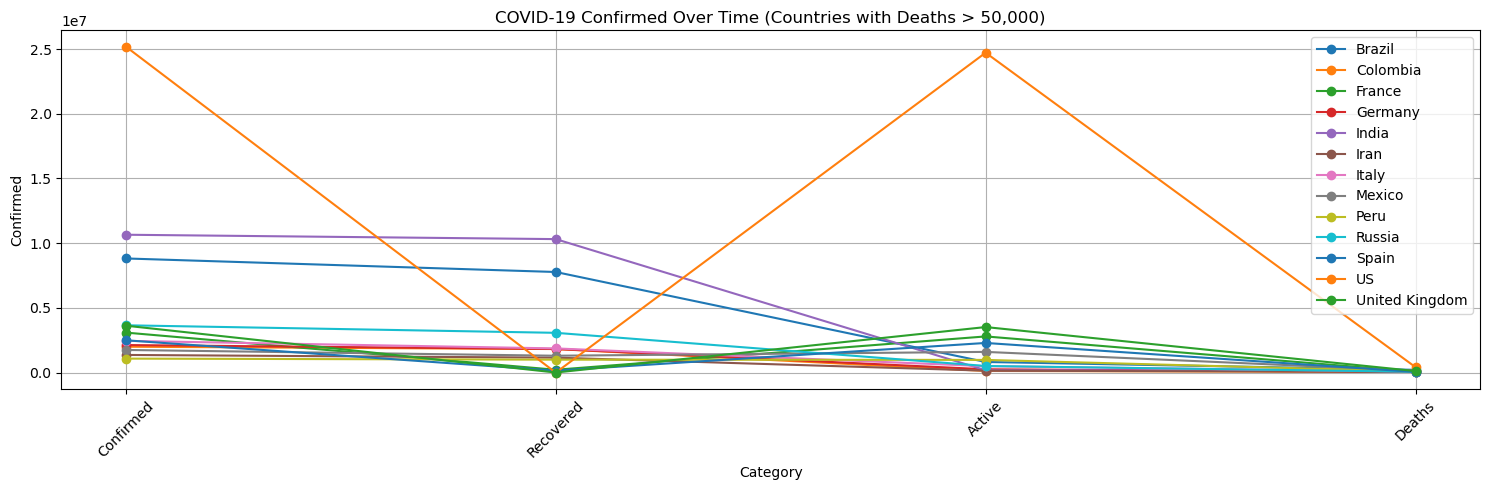

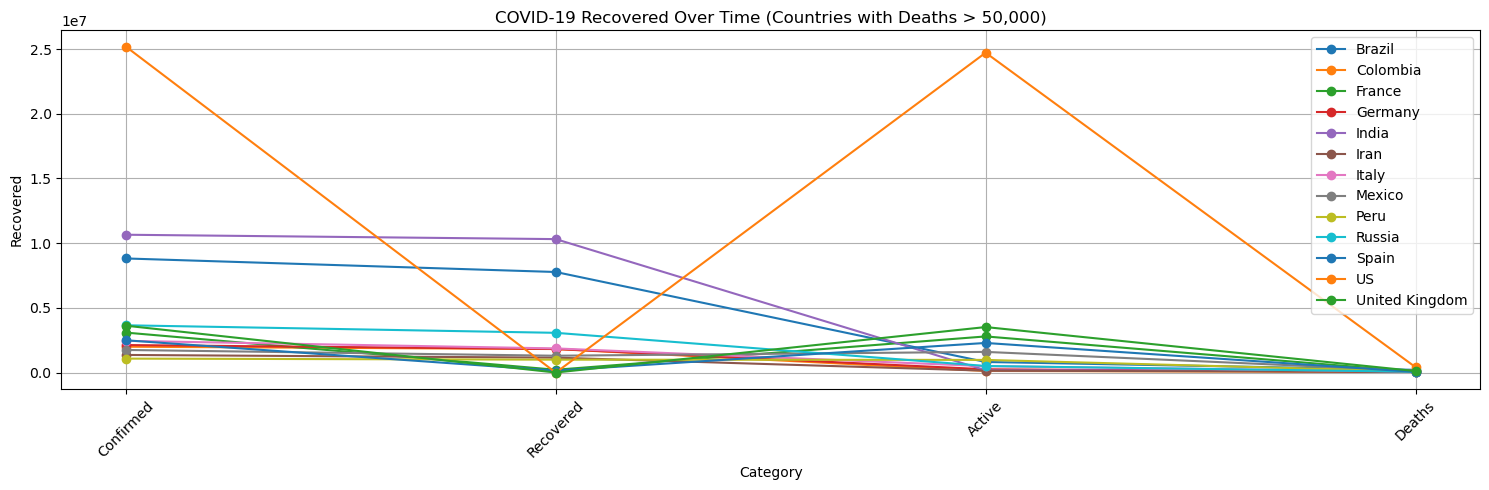

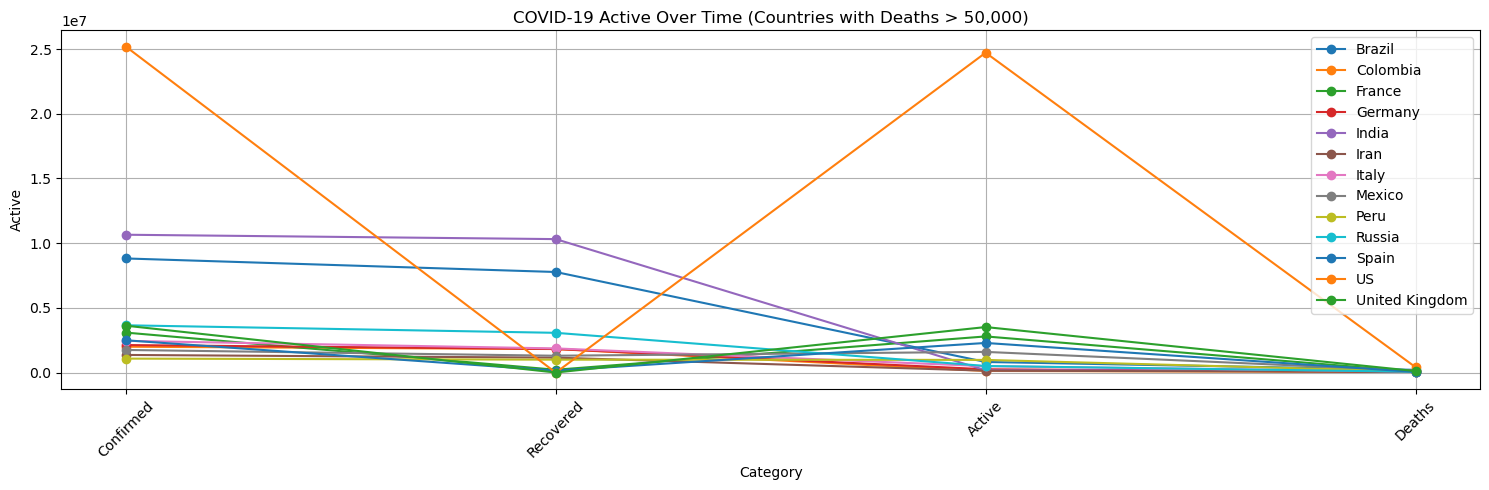

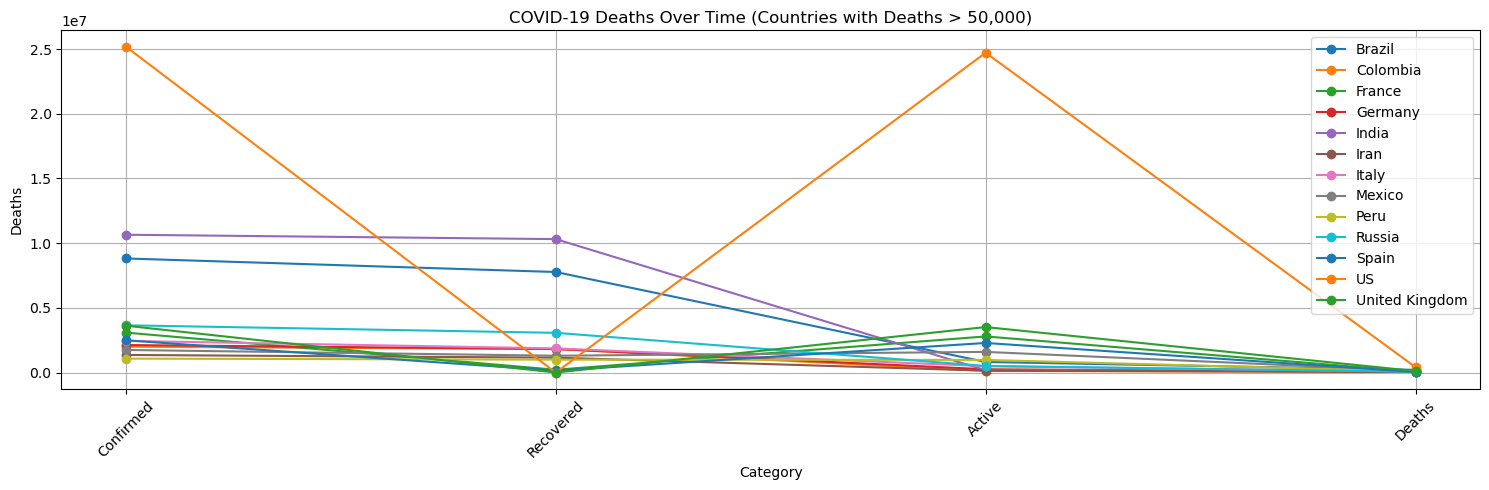

In [26]:
# Plotting Figure into Line graph for deaths over 50000
for i in filter_ds.columns:
    plt.figure(figsize=(15, 5))
    for country in filter_ds.index:
        plt.plot(filter_ds.columns, filter_ds.loc[country], marker='o', label=country)
    plt.xlabel('Category')
    plt.ylabel(i)
    plt.title(f'COVID-19 {i} Over Time (Countries with Deaths > 50,000)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

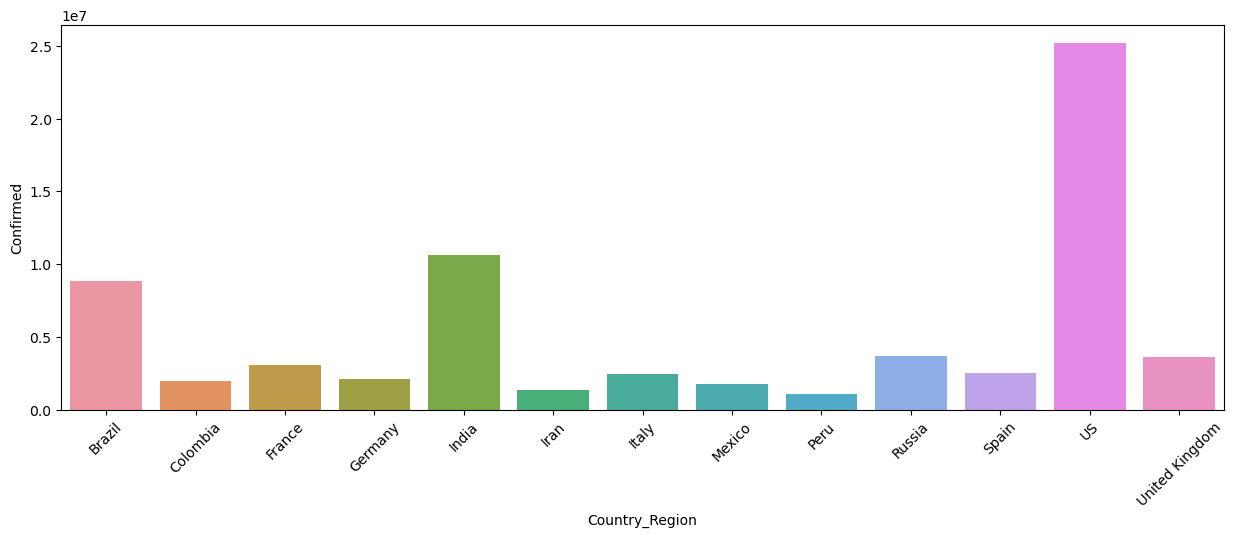

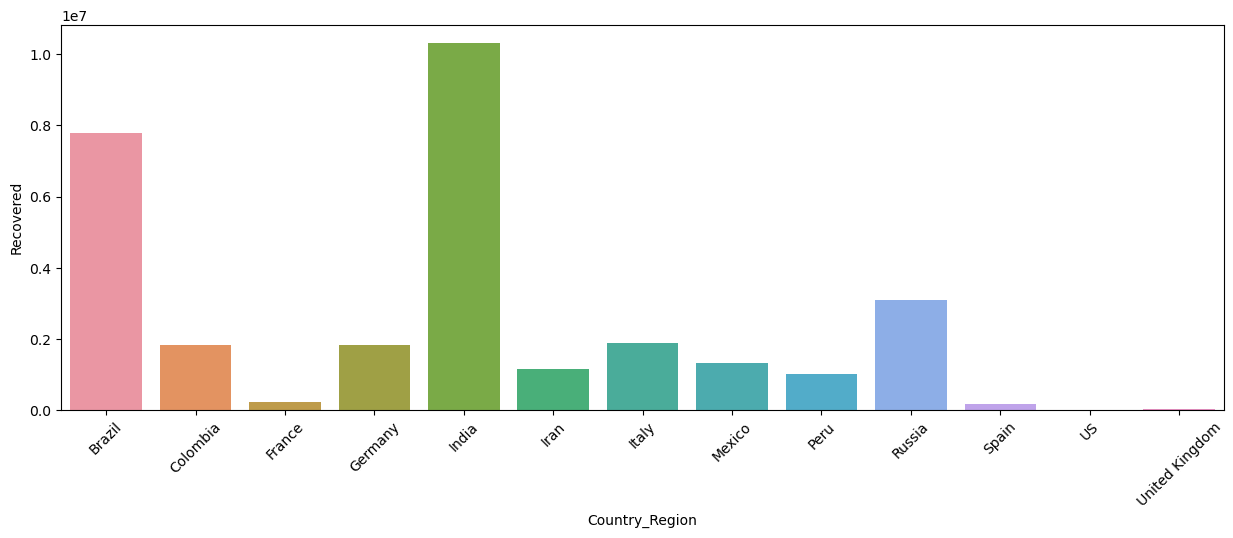

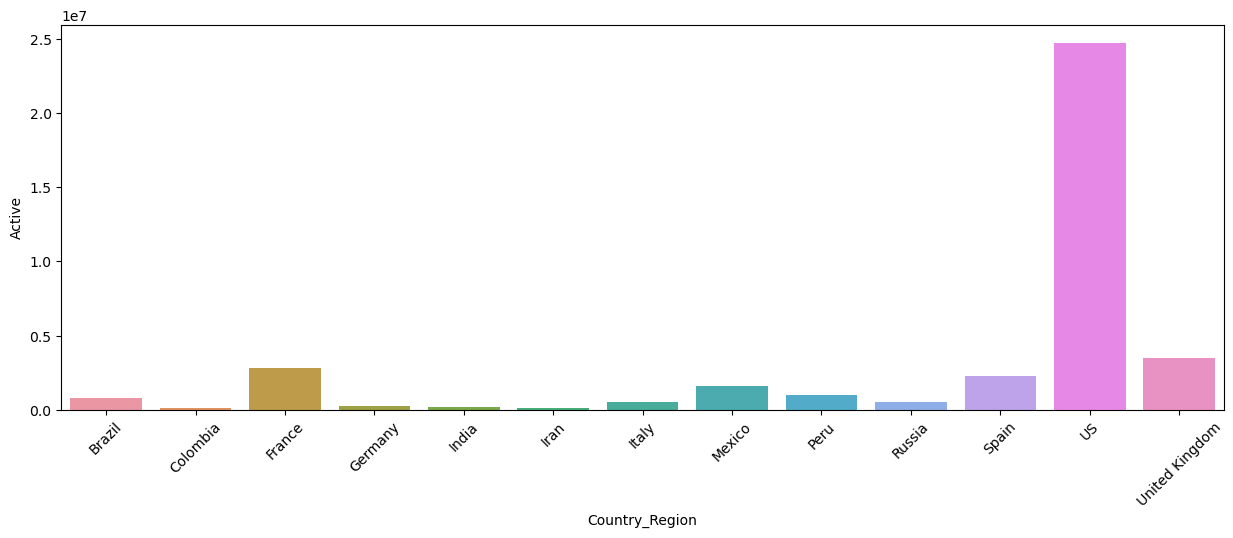

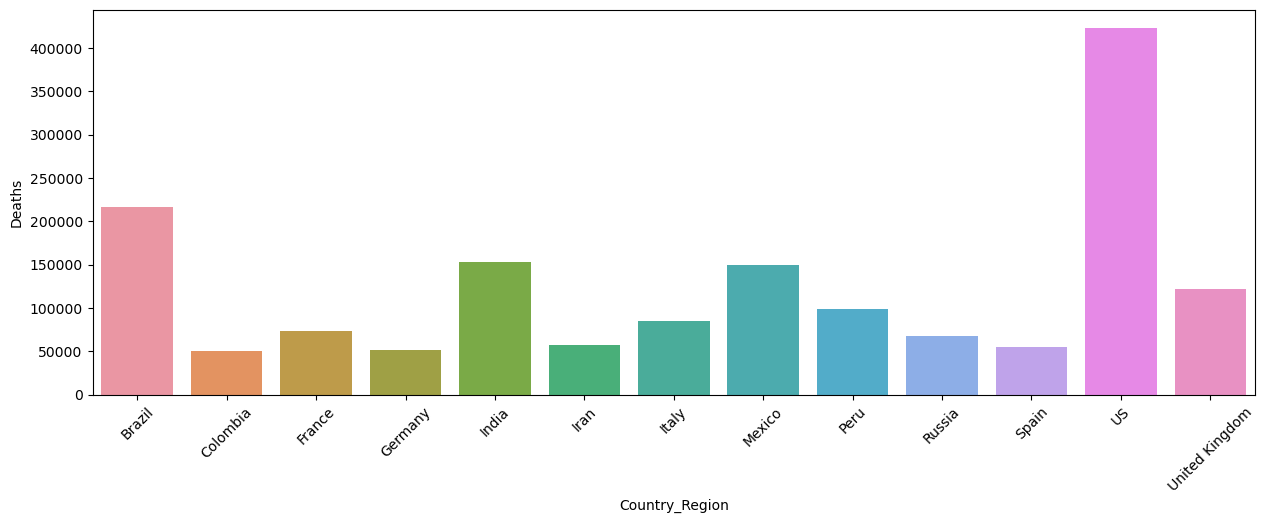

In [27]:
# Plotting Bar Graph for more clarity
for i in filter_ds.columns:
    plt.figure(figsize=(15,5))
    sns.barplot(data=filter_ds,x=filter_ds.index,y=i,label=i)
    plt.xticks(rotation=45)
    plt.show();

### Question 6

### Plot Province/State wise Deaths in USA

In [28]:
import plotly.express as px

In [29]:
# Importing Data
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [30]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [31]:
# Filtering Us Data
us_covid_data = covid_data[covid_data['Country_Region'] == 'US']
us_covid_data.head()
us_deaths_states = us_covid_data.groupby('Province_State')['Deaths'].sum()
fig = px.bar(us_deaths_states,x=us_deaths_states.index,y='Deaths')
fig.show()

In [32]:
fig = px.density_mapbox(us_covid_data,lat='Lat',lon='Long_',z='Deaths',mapbox_style='open-street-map',radius=35,zoom=5)
fig.update_layout(height=600)

fig.show();

### Question 7

### Plot Province/State Wise Active Cases in USA

In [33]:
# Plotting Province/State Wise Active Cases in USA
us_active_states = us_covid_data.groupby('Province_State')['Active'].sum()
fig = px.bar(us_active_states,x=us_active_states.index,y='Active')
fig.show()

In [34]:
fig = px.density_mapbox(us_covid_data,lat='Lat',lon='Long_',z='Active',mapbox_style='open-street-map',radius=35,zoom=5)
fig.update_layout(height=600)

fig.show();

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [35]:
# Plotting Province/State Wise Confirmed Cases in USA
us_confirmed_states = us_covid_data.groupby('Province_State')['Confirmed'].sum()
fig = px.bar(us_confirmed_states,x=us_confirmed_states.index,y='Confirmed')
fig.show()

In [36]:
fig = px.density_mapbox(us_covid_data,lat='Lat',lon='Long_',z='Confirmed',mapbox_style='open-street-map',radius=35,zoom=5)
fig.update_layout(height=600)

fig.show();

### Question 9

### Plot Worldwide Confirmed Cases over time

In [37]:
import plotly.express as px
import plotly.io as pio

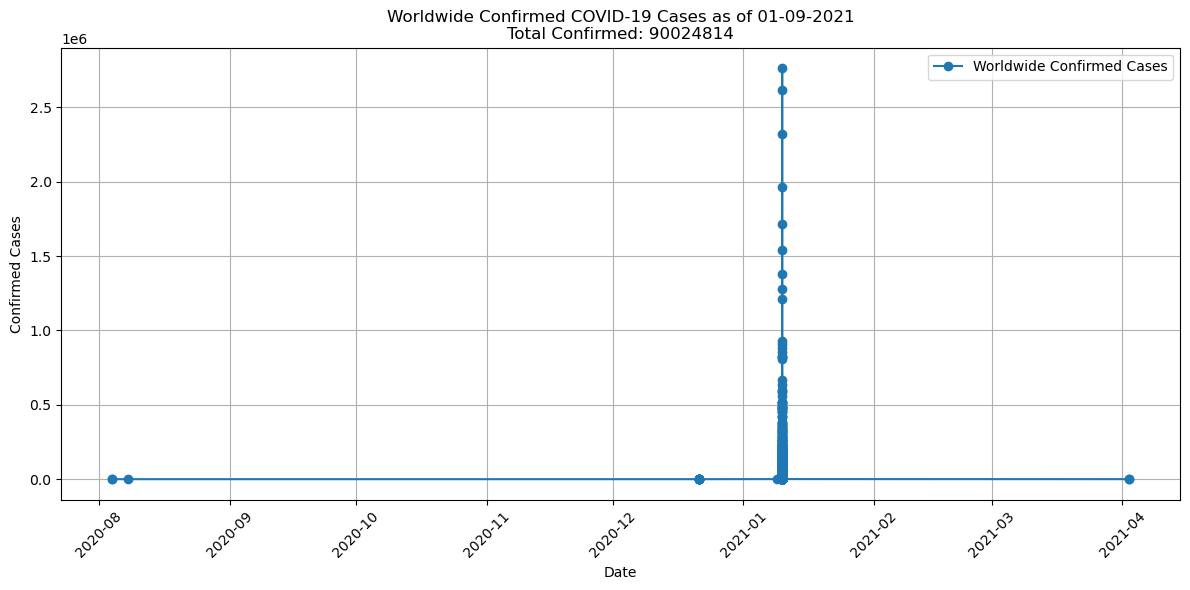

In [38]:
# Convert 'Last_Update' to datetime
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'])

# Sort the DataFrame by 'Last_Update'
covid_data_sorted = covid_data.sort_values('Last_Update')

# Recalculate the worldwide confirmed cases (if needed)
worldwide_confirmed = covid_data_sorted['Confirmed'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(covid_data_sorted['Last_Update'], covid_data_sorted['Confirmed'], marker='o', linestyle='-', label='Worldwide Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(f'Worldwide Confirmed COVID-19 Cases as of 01-09-2021\nTotal Confirmed: {worldwide_confirmed}')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Plotting using plotly express
worldwide_confirmed = covid_data['Confirmed'].sum()

fig = px.line(covid_data, x='Last_Update', y='Confirmed', 
              title=f'Worldwide Confirmed COVID-19 Cases as of 01-09-2021\nTotal Confirmed: {worldwide_confirmed}',
              labels={'Confirmed': 'Confirmed Cases', 'Last_Update': 'Date'})

fig.update_xaxes(tickangle=45)
fig.show()

In [40]:
fig = px.density_mapbox(covid_data, lat='Lat', lon='Long_', z='Confirmed', 
                        mapbox_style="open-street-map", 
                        center={"lat": 0, "lon": 0}, # Center of the map
                        zoom=0.001) # Zoom level, smaller numbers are more zoomed out

fig.show()